<h4>Deep Learning Network Train<h4>
<h6>
input(2)</br>
dense(16, relu)</br>
dense(16, relu)</br>
dense(16, relu)</br>
dense(16, relu)</br>
dense(1, sigmoid)</br></h6>

train_X.shape (191, 2)
train_y.shape (191,)


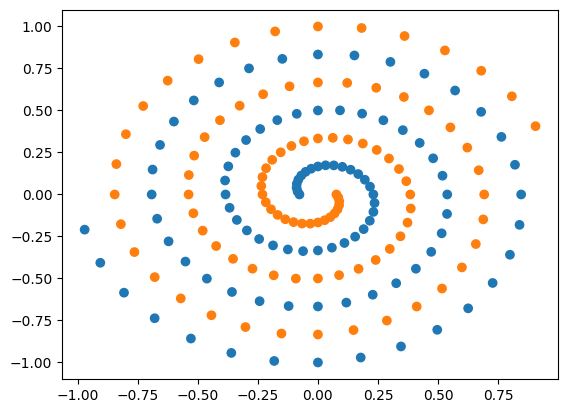

In [1]:
import pandas as pd
import numpy as np
np.random.seed(4375689)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

train_data = pd.read_csv('spiral.csv').values
train_X = train_data[:,0:2]
train_y = train_data[:,2]

print('train_X.shape', train_X.shape)
print('train_y.shape', train_y.shape)

colors = ['C'+str(int(v)) for v in train_y]
import matplotlib.pyplot as plt
plt.scatter(train_X[:,0], train_X[:,1], c=colors)
plt.show()

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
			  
print('fit')
history = model.fit(train_X, train_y, batch_size=32, epochs=100, verbose=1)

print('evaluate')
score = model.evaluate(train_X, train_y, verbose=2)

print('loss=', score[0], 'acc=', score[1])


fit
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4939 - loss: 0.6941
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4958 - loss: 0.6924 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5113 - loss: 0.6928 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5245 - loss: 0.6909 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5489 - loss: 0.6904 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5392 - loss: 0.6907 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5680 - loss: 0.6899 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5429 - loss: 0.6907 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5730 - loss: 0.6876 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5738 - loss: 0.6875 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5820 - loss: 0.6853 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5960 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


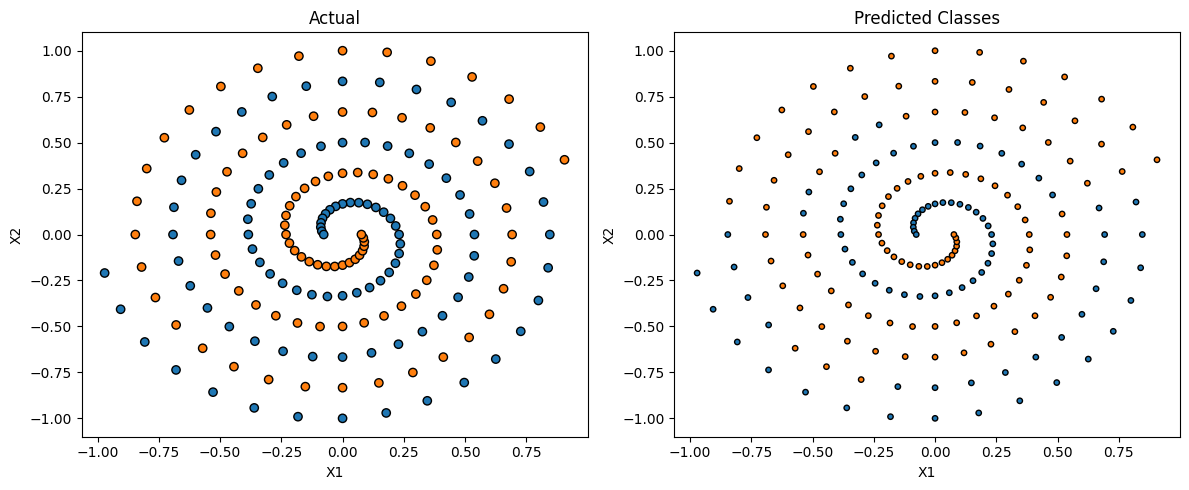

Training Accuracy: 0.7330


In [9]:
# Use existing training data for evaluation
test_X = train_X
test_y = train_y

# Predict using the trained model on training data
pred_y = model.predict(test_X)
pred_classes = (pred_y > 0.5).astype(int).flatten()

# Plot actual data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_X[:, 0], train_X[:, 1], c=colors, edgecolor='k')
plt.title('Actual')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot predicted classes
plt.subplot(1, 2, 2)
pred_colors = ['C'+str(int(v)) for v in pred_classes]
plt.scatter(train_X[:, 0], train_X[:, 1], c=pred_colors, edgecolor='k', s=15)
plt.title('Predicted Classes')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

# Calculate accuracy
accuracy = np.mean(pred_classes == train_y)
print(f'Training Accuracy: {accuracy:.4f}')